In [11]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
# Load dataset from library
wdi = pd.read_csv('/stor/home/jzb284/SDS 322E/final_project/wdi_data_python.csv')

# Take a look
display(wdi)

,time,country,country_code,population,gdp_per_capita,gni_per_capita,death_rate,birth_rate,fertility_rate,life_expectancy,water,sanitation,literacy_rate,poverty_gap,poverty_national,electricity,co2,gender_equality,undernourishment,mortality_rate
0,1960,Afghanistan,AFG,8622466.0,NaN,NaN,31.921,50.340,7.282,32.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,Albania,ALB,1608800.0,NaN,NaN,16.681,41.068,6.455,54.439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,Algeria,DZA,11394307.0,NaN,NaN,23.785,48.722,7.503,40.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.6
3,1960,American Samoa,ASM,20085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,Andorra,AND,9443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,2022,Virgin Islands (U.S.),VIR,105413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.108544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13667,2022,West Bank and Gaza,PSE,5043612.0,6756.783285,8170.0,NaN,NaN,NaN,NaN,98.444640,99.441606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13668,2022,"Yemen, Rep.",YEM,33696614.0,NaN,NaN,NaN,NaN,NaN,NaN,61.758244,54.844758,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN
13669,2022,Zambia,ZMB,20017675.0,3894.310259,3680.0,NaN,NaN,NaN,NaN,68.247807,36.301369,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [4]:
wdi.dtypes

time                  int64
country              object
country_code         object
population          float64
gdp_per_capita      float64
gni_per_capita      float64
death_rate          float64
birth_rate          float64
fertility_rate      float64
life_expectancy     float64
water               float64
sanitation          float64
literacy_rate       float64
poverty_gap         float64
poverty_national    float64
electricity         float64
co2                 float64
gender_equality     float64
undernourishment    float64
mortality_rate      float64
dtype: object

In [5]:
wdi_clean = wdi.drop(columns=['country_code'])
display(wdi_clean)

,time,country,population,gdp_per_capita,gni_per_capita,death_rate,birth_rate,fertility_rate,life_expectancy,water,sanitation,literacy_rate,poverty_gap,poverty_national,electricity,co2,gender_equality,undernourishment,mortality_rate
0,1960,Afghanistan,8622466.0,NaN,NaN,31.921,50.340,7.282,32.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,Albania,1608800.0,NaN,NaN,16.681,41.068,6.455,54.439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,Algeria,11394307.0,NaN,NaN,23.785,48.722,7.503,40.532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.6
3,1960,American Samoa,20085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,Andorra,9443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,2022,Virgin Islands (U.S.),105413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.108544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13667,2022,West Bank and Gaza,5043612.0,6756.783285,8170.0,NaN,NaN,NaN,NaN,98.444640,99.441606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13668,2022,"Yemen, Rep.",33696614.0,NaN,NaN,NaN,NaN,NaN,NaN,61.758244,54.844758,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN
13669,2022,Zambia,20017675.0,3894.310259,3680.0,NaN,NaN,NaN,NaN,68.247807,36.301369,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import HuberRegressor 

In [9]:
wdi_clean.dropna(subset=['life_expectancy', 'sanitation'], inplace=True)
display(wdi_clean)

,time,country,population,gdp_per_capita,gni_per_capita,death_rate,birth_rate,fertility_rate,life_expectancy,water,sanitation,literacy_rate,poverty_gap,poverty_national,electricity,co2,gender_equality,undernourishment,mortality_rate
8680,2000,Afghanistan,19542982.0,NaN,NaN,12.096,49.664,7.534,55.298000,27.441856,20.970919,NaN,NaN,NaN,4.446891,0.055167,NaN,NaN,90.6
8681,2000,Albania,3089027.0,3861.333006,3980.0,5.798,17.076,2.231,75.404000,86.397044,89.488671,NaN,NaN,NaN,99.430855,1.031568,NaN,NaN,24.1
8682,2000,Algeria,30774621.0,8510.359279,8090.0,5.037,19.543,2.566,70.478000,89.848829,84.480830,NaN,NaN,NaN,98.640030,2.601065,NaN,NaN,35.6
8685,2000,Angola,16394062.0,3285.953416,2790.0,18.287,47.647,6.639,46.024000,41.144310,27.557524,NaN,9.1,NaN,24.238865,0.988416,NaN,NaN,121.9
8687,2000,Argentina,37070774.0,11542.986003,11240.0,7.600,19.366,2.591,73.926000,96.284026,87.666927,NaN,2.7,NaN,95.680473,3.567918,NaN,NaN,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13449,2021,Virgin Islands (U.S.),105870.0,NaN,NaN,8.600,11.800,2.010,80.068293,NaN,99.106812,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN
13450,2021,West Bank and Gaza,4922749.0,6224.656776,7470.0,3.815,28.236,3.504,73.473000,98.171000,99.097440,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,12.8
13451,2021,"Yemen, Rep.",32981641.0,NaN,NaN,6.845,30.544,3.795,63.753000,61.595207,54.595603,NaN,NaN,NaN,74.877197,NaN,1.5,NaN,46.7
13452,2021,Zambia,19473125.0,3571.661386,3260.0,6.973,34.511,4.308,61.223000,68.034783,36.241999,NaN,NaN,NaN,46.685116,NaN,3.0,NaN,40.2


Text(0, 0.5, 'Life Expectancy')

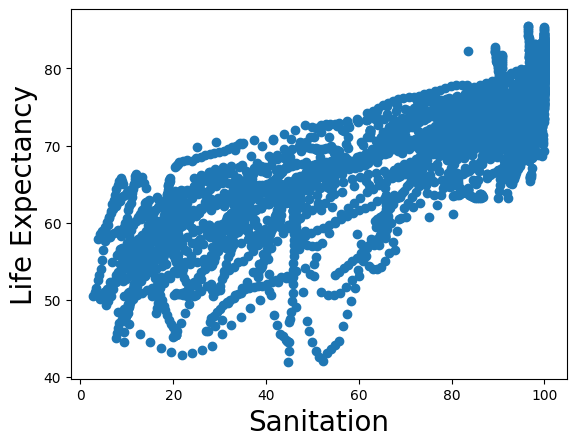

In [12]:
plt.scatter(wdi_clean[["sanitation"]].values, wdi_clean[["life_expectancy"]].values)

plt.xlabel('Sanitation', size=20)
plt.ylabel('Life Expectancy', size=20)

Text(0.5, 0, 'Sanitation')

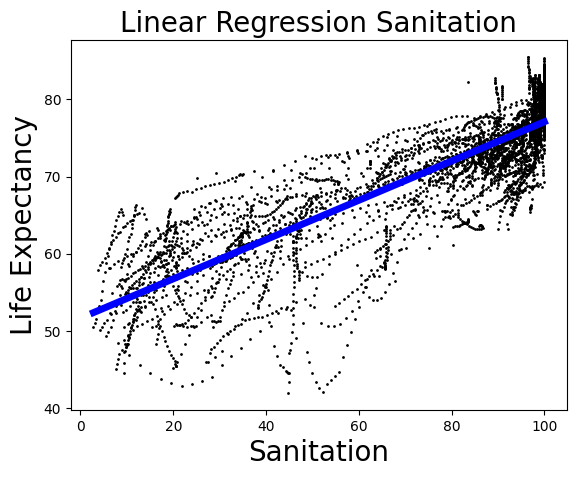

In [19]:
reg = LinearRegression().fit(np.array(wdi_clean['sanitation'])[:, np.newaxis], wdi_clean['life_expectancy'].values.ravel())
    
xlin = np.linspace(min(wdi_clean['sanitation']), max(wdi_clean['sanitation']), 101)
ylin = reg.predict(xlin[:, np.newaxis])

plt.title('Linear Regression Sanitation', size=20)
plt.plot(wdi_clean['sanitation'], wdi_clean['life_expectancy'], 'ok', markersize = 1)
plt.plot(xlin, ylin, '-b', linewidth = 5)
plt.ylabel('Life Expectancy', size=20)
plt.xlabel('Sanitation', size=20) 